# X-Ray Diffraction

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize as opt
import scipy.constants as const
import pandas as pd

title_size = 20
axis_size = 16
annotate_size = 12
plt.rcParams["font.family"] = "Times New Roman"

In [15]:
density = 2.64 #g/cm^3
m_tot = 25.94 #u
m = 4*m_tot / const.N_A #g
Volume = m/density #cm^3
a = (Volume)**(1/3) #cm
d = a/(2) #cm
print('d =',d,'cm',a)

d = 2.0130831588218416e-08 cm 4.026166317643683e-08


## Pre-lab Questions fix question C

1.a) Read labscript and relevant course material. Elements used from mathematical techniques are: scipy curve_fit and chi squared test.
<br>
<br>

1.b) From the equation $m\lambda = 2d\sin\theta$ from this for a higher wavelength the angle of diffraction will be greater than for a lower wavelength. As the energy of the K-alpha is lower as it comes from the n = 2 to the n = 1 shell, the wavelength will be higher and the angle of diffraction will be greater then that of the K-beta which comes from the n = 3 to the n = 1 shell.
Therefore the K-beta peak will be observed first and the K-alpha peak will be observed second.
<br>
<br>

1.c) Calculate the Interatomic spacing of a LiF cubic crystal using $d = \frac{a}{\sqrt{3}}$ where a is the lattice constant. First calculate the lattice constant from the mass and the density of the crystal. 

<br>
<br>
$\rho = 2.64 g/cm^3$
<br>
<br>

$m_{tot} = 25.94 u$
<br>
<br>
$$m_{tot} = \frac{2*25.94}{6.022\times 10^{23}} = 8.436\times 10^{-23} g$$
<br>
<br>
$$Volume = \frac{m_{tot}}{\rho} = \frac{8.436\times 10^{-23}}{2.64} = 3.195\times 10^{-23} cm^3$$
<br>
<br>
$$a = \sqrt[3]{Volume} = \sqrt[3]{3.195\times 10^{-23}} = 3.173\times 10^{-8} cm$$
<br>
<br>
$$d = \frac{a}{\sqrt{3}} = \frac{3.173\times 10^{-8}}{\sqrt{3}} = 1.832\times 10^{-8} cm$$

## Aims

The aims of this experiemnt are to verify the wavelengths of the K-alpha and K-beta lines of X-rays using a crystal (LiF) of known interatomic spacing and then using the same method to determine the interatomic spacing of 2 crystals (NaCl and KCl).

## Mearsuring the Wavelengths of the K-alpha and K-beta lines of X-rays using a crystal of known interatomic spacing

In this task we will use a crystal of known interatomic spacing to measure the wavelengths of the K-alpha and K-beta lines of X-rays. The interatomic spacing of the crystal LiF is $2.013\times 10^{-10} m$. As calculated in the pre-lab questions. From the labscript we are told that that the first order peaks of K-alpha and K-beta occur at $2\theta = 40-45^\circ$ where ($2\theta$ is the angle of the geiger counter with respect to the X-ray source and twice that that of the crystal to the source). Counts of radiation are taken across all angles but with a more dense form around the region of the peaks as this will allow for a more accurate value of the wavelength to be calculated. For all angles the resulting counts form the Bremsstrahlung radiation of Copper. The counts have been plotted against angle in the graphs below. The scipy.optimize.curv_fit function of a guassian curve was then fit to the peaks as this would reduce the uncertainty on the peak position of the curve. Then using the angle equavalent to where this peak occurs and the equation $m\lambda = 2d\sin\theta$ the wavelength of the radiation was calculated. The results are shown in the table below.

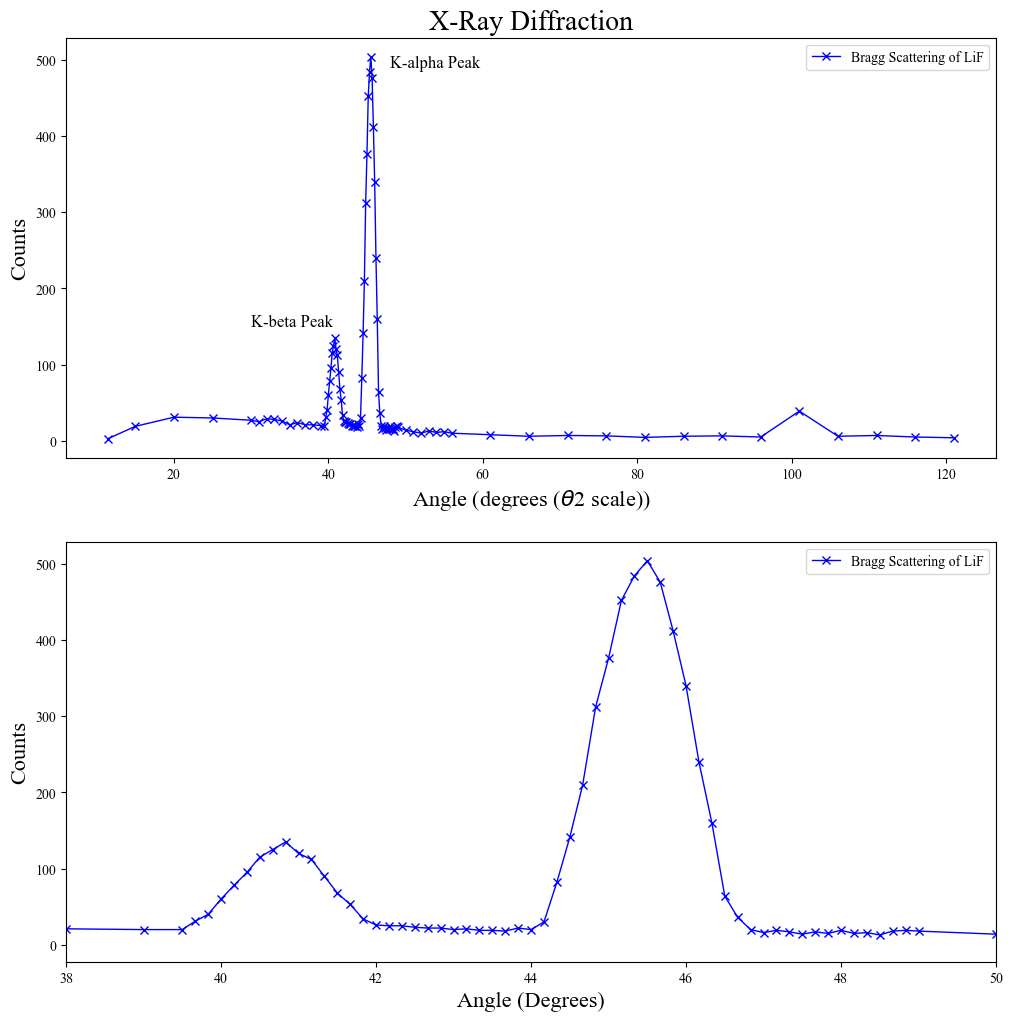

In [16]:
angle  = np.loadtxt('xray_data_LiF.txt', usecols=0, delimiter=',')
counts = np.loadtxt('xray_data_LiF.txt', usecols=1, delimiter=',')
rad = angle * np.pi / 180

sorted_angle = np.sort(angle)
sorted_counts = ([counts[np.where(angle == i)] for i in sorted_angle])
flat_counts = [item for sublist in sorted_counts for item in sublist]

popt, pcov = opt.curve_fit(lambda x, a, b: a*np.sin(x)**2 + b, rad, flat_counts, p0=[1,1])

plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.plot(sorted_angle, sorted_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of LiF')
plt.xlabel(r'Angle (degrees ($\theta$2 scale))', fontsize=axis_size)
plt.ylabel('Counts', fontsize=axis_size)
plt.title('X-Ray Diffraction', fontsize=title_size)
plt.annotate('K-beta Peak', xy=(30, 150), fontsize=annotate_size)
plt.annotate('K-alpha Peak', xy=(48, 490), fontsize=annotate_size)
plt.legend()

plt.subplot(2,1,2)
plt.plot(sorted_angle, sorted_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of LiF')
plt.xlabel('Angle (Degrees)', fontsize=axis_size)
plt.xlim(38,50)
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.show()


In [40]:
def FWHM(x,y):
    half_max = np.max(y)/2 
    x1 = x[np.where(y > half_max)]
    x2 = x[np.where(y > half_max)]
    return x1[-1] - x2[0]

peaks_indexes,peaks = sp.signal.find_peaks(flat_counts, height=100, distance=10)
def wavelength(d, theta,m):
    return ((2*d*np.sin(theta/2))/m)*10**(-2)
def energy(wavelength):
    return (const.h*const.c/wavelength)/const.e
m=1
angle = (sorted_angle[peaks_indexes])
rad = (angle) * np.pi / 180

k_beta = wavelength(d,rad[0],m)
k_alpha = wavelength(d,rad[1],m)

# print(f'The peaks for the K-alpha and K-beta lines are at {angle[0]} and {angle[1]} degrees respectively')
# print(f'The Wavelength of the K-alpha line is {wavelength(d,rad[0],m):2e} m, and K-beta line is {wavelength(d,rad[1],m):2e} m')
# print(f'The Energy of the K-alpha line is {energy(wavelength(d,rad[0],m)):2e} eV, and K-beta line is {energy(wavelength(d,rad[1],m)):2e} eV')

waves = [wavelength(d,rad[0],m),wavelength(d,rad[1],m)]
energy = [energy(wavelength(d,rad[0],m)),energy(wavelength(d,rad[1],m))]

df = pd.DataFrame({'Angle (degrees)':angle,'Wavelength (m)': waves,'Energy (eV)': energy},index = ['K-beta','K-alpha'])
angle = df['Angle (degrees)'].round(2)
waves = df['Wavelength (m)'].round(15)
energy = df['Energy (eV)'].round(1)

df = pd.DataFrame({'Angle (degrees)':angle,'Wavelength (m)': waves,'Energy (eV)': energy},index = ['K-beta','K-alpha'])
df

,Angle (degrees),Wavelength (m),Energy (eV)
K-beta,40.83,1.404510e-10,8827.6
K-alpha,45.50,1.556960e-10,7963.2


## Measuring the interatomic spacing of 2 crystals (KCl and NaCl) using the previously measured wavelengths of the K-alpha and K-beta lines of X-rays

In this task we will use the same method as used of the LiF crystal where counts will be taken across all angles but with a more dense form around the regions of interest (where the first and second order peaks occur) as this will reduce the uncertainty on the peak position of the curve. After defining a function to calculate the interatomic spacing of the crystal the curve of both crystals will be plotted with graphs showing a closer look at the peaks. And the interatomic spacings can be calculated and displayed in the table below.

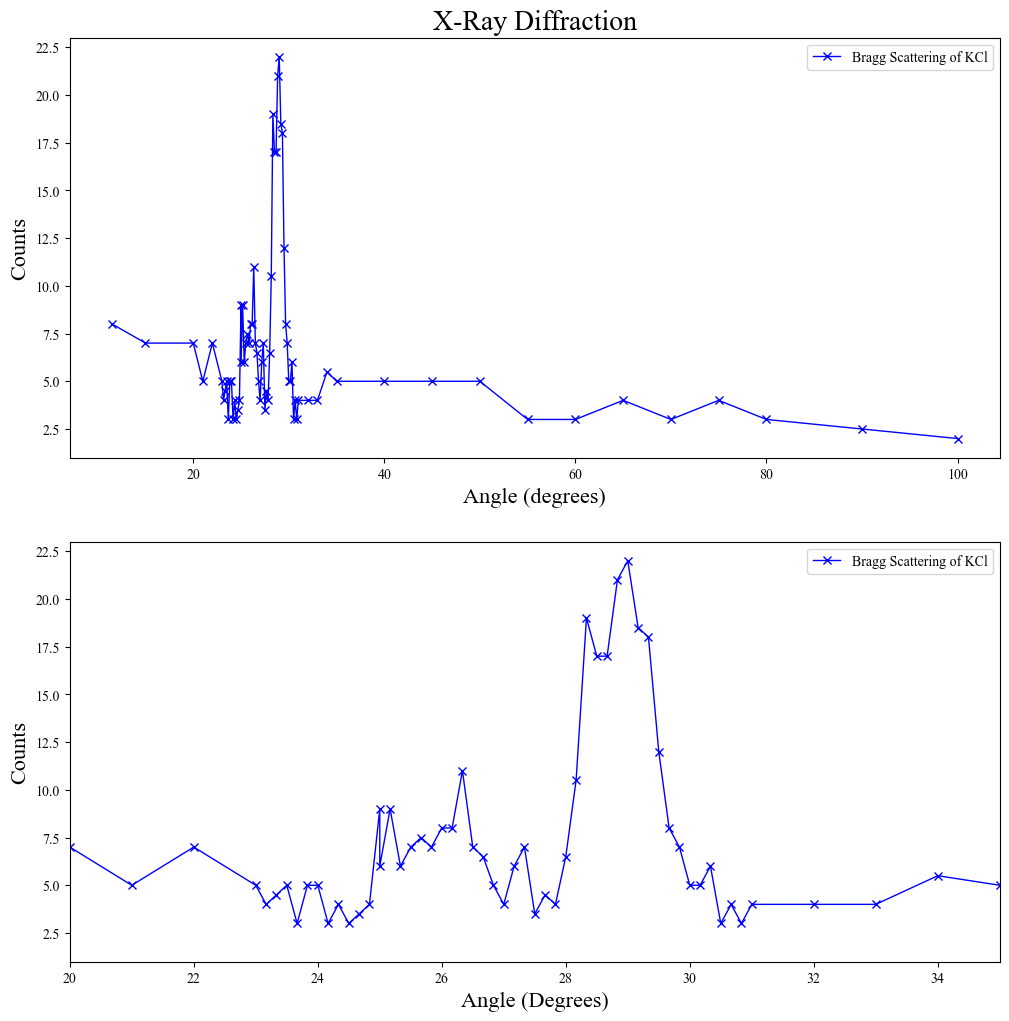

In [12]:
angle  = np.loadtxt('xray_data_KCl.txt', usecols=0, delimiter=',')
counts = np.loadtxt('xray_data_KCl.txt', usecols=1, delimiter=',')
rad = angle * np.pi / 180

sorted_angle = np.sort(angle)
sorted_counts = ([counts[np.where(angle == i)] for i in sorted_angle])
flat_counts = [item for sublist in sorted_counts for item in sublist]
flat_counts = (flat_counts[:70])

plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of KCl')
plt.xlabel('Angle (degrees)', fontsize=axis_size)
plt.ylabel('Counts', fontsize=axis_size)
plt.title('X-Ray Diffraction', fontsize=title_size)
plt.legend()

plt.subplot(2,1,2)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of KCl')
plt.xlabel('Angle (Degrees)', fontsize=axis_size)
plt.xlim(20,35)
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.show()

In [13]:
def lat_const(theta,m,wavelength):
    return 2*(m*wavelength)/(2*np.sin(theta/2))

peaks_indexes,peaks = sp.signal.find_peaks(flat_counts, height=10, distance=10)
m=1
angle = (sorted_angle[peaks_indexes])
rad = (angle) * np.pi / 180

a_beta = lat_const(rad[0],m,k_beta)
a_alpha = lat_const(rad[1],m,k_alpha)

print(f'The peaks for the K-alpha and K-beta lines are at {angle[0]} and {angle[1]} degrees respectively')
print(f'The Lattice Constant (a) of KCl for the K-alpha line is {lat_const(rad[0],m,k_beta):2e} m, and K-beta line is {lat_const(rad[1],m,k_alpha):2e} m')
print(f'And thus the interatomic spacing is half this value, {lat_const(rad[0],m,k_beta)/2:2e} m, and {lat_const(rad[1],m,k_alpha)/2:2e} m')

The peaks for the K-alpha and K-beta lines are at 26.3333333 and 29.0 degrees respectively
The Lattice Constant (a) of KCl for the K-alpha line is 6.165947e-10 m, and K-beta line is 6.218399e-10 m
And thus the interatomic spacing is half this value, 3.082973e-10 m, and 3.109199e-10 m


# NaCl

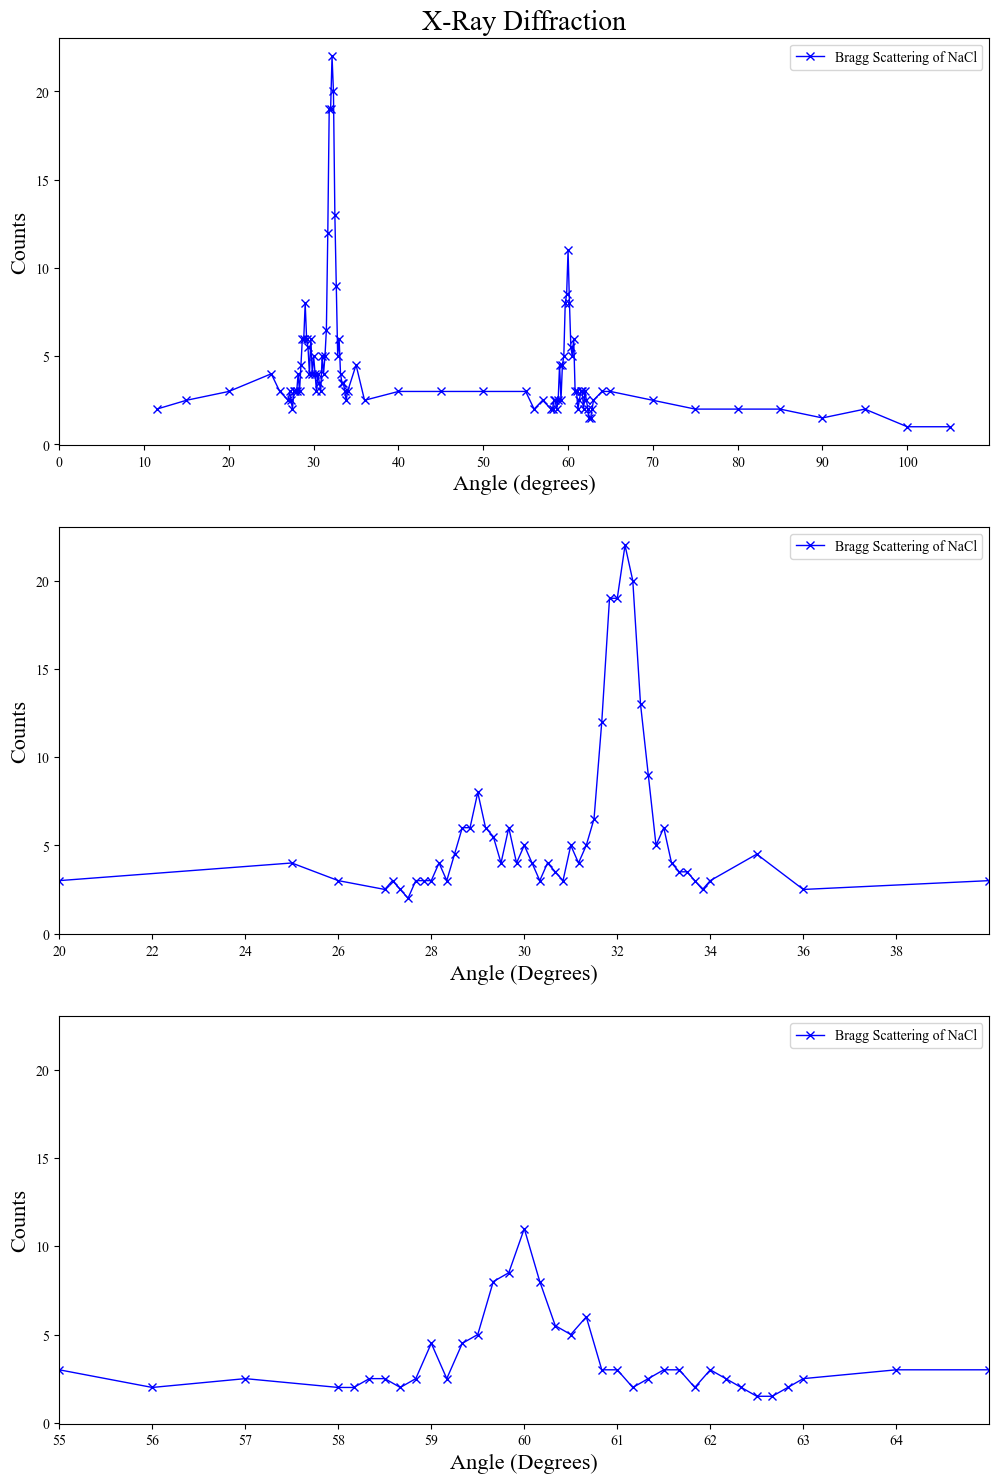

In [7]:
angle  = np.loadtxt('xray_data_NaCl.txt', usecols=0, delimiter=',')
counts = np.loadtxt('xray_data_NaCl.txt', usecols=1, delimiter=',')
rad = angle * np.pi / 180

sorted_angle = np.sort(angle)
sorted_counts = ([counts[np.where(angle == i)] for i in sorted_angle])
flat_counts = [item for sublist in sorted_counts for item in sublist]
#flat_counts = (flat_counts[:70])

plt.figure(figsize = (12,18))
plt.subplot(3,1,1)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of NaCl')
plt.xlabel('Angle (degrees)', fontsize=axis_size)
plt.xticks(np.arange(0,110,10))
plt.ylabel('Counts', fontsize=axis_size)
plt.title('X-Ray Diffraction', fontsize=title_size)
plt.legend()

plt.subplot(3,1,2)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of NaCl')
plt.xlabel('Angle (Degrees)', fontsize=axis_size)
plt.xlim(20,40)
plt.xticks(np.arange(20,40,2))
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.subplot(3,1,3)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of NaCl')
plt.xlabel('Angle (Degrees)', fontsize=axis_size)
plt.xlim(55,65)
plt.xticks(np.arange(55,65,1))
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.show()